In [80]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install seaborn

In [85]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats

In [87]:
df=pd.read_csv("C:/Users/sivad/Documents/7SEM/dvp/powerconsumption.csv")

In [88]:
# Display the first few rows of the dataframe
print("Head of the dataframe:")
print(df.head())

Head of the dataframe:
        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3          

In [89]:
# Display information about the dataframe (data types, non-null values, etc.)
print("\nInformation about the dataframe:")
print(df.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None


In [90]:
# Data cleaning (example: fill missing values with mean)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if column is numeric
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # Handle non-numeric columns (e.g., with mode)
            df[col].fillna(df[col].mode()[0], inplace=True)

In [91]:
# Check for null values
print("\nNull values:")
print(df.isnull().sum())


Null values:
Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [92]:
# Data insights (examples)
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.69620

In [93]:
# Convert 'Datetime' column to numeric representation (e.g., Unix timestamp)
# This assumes 'Datetime' is the name of your datetime column
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])  # Convert to datetime objects
    df['Datetime'] = df['Datetime'].astype(np.int64) // 10**9  # Convert to Unix timestamp

print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
                        Datetime  Temperature  Humidity  WindSpeed  \
Datetime                1.000000     0.283018 -0.021818   0.180348   
Temperature             0.283018     1.000000 -0.460243   0.477109   
Humidity               -0.021818    -0.460243  1.000000  -0.135853   
WindSpeed               0.180348     0.477109 -0.135853   1.000000   
GeneralDiffuseFlows    -0.018527     0.460294 -0.468138   0.133733   
DiffuseFlows           -0.131816     0.196522 -0.256886  -0.000972   
PowerConsumption_Zone1 -0.001910     0.440221 -0.287421   0.167444   
PowerConsumption_Zone2  0.325206     0.382428 -0.294961   0.146413   
PowerConsumption_Zone3 -0.233929     0.489527 -0.233022   0.278641   

                        GeneralDiffuseFlows  DiffuseFlows  \
Datetime                          -0.018527     -0.131816   
Temperature                        0.460294      0.196522   
Humidity                          -0.468138     -0.256886   
WindSpeed                         

C:\Users\sivad\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


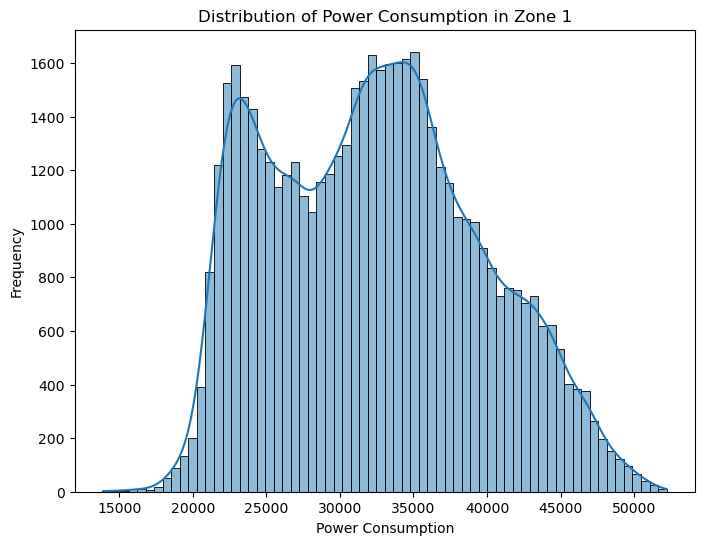

In [94]:
# 1. Correlation Matrix (already included above)
# 2. Distribution of Power Consumption
plt.figure(figsize=(8, 6))
sns.histplot(df['PowerConsumption_Zone1'], kde=True)
plt.title('Distribution of Power Consumption in Zone 1')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

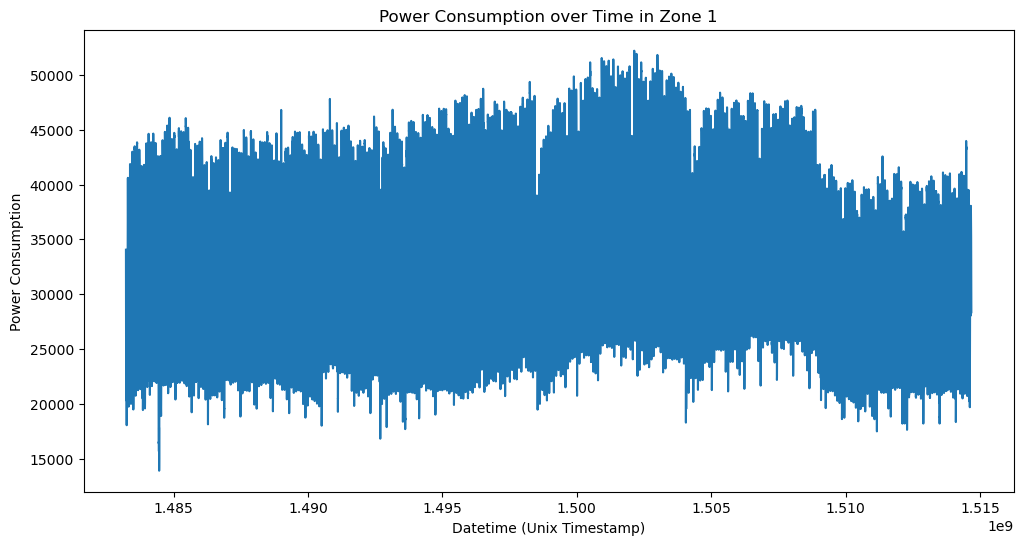

In [95]:
# 3. Power Consumption over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'])
plt.title('Power Consumption over Time in Zone 1')
plt.xlabel('Datetime (Unix Timestamp)')
plt.ylabel('Power Consumption')
plt.show()

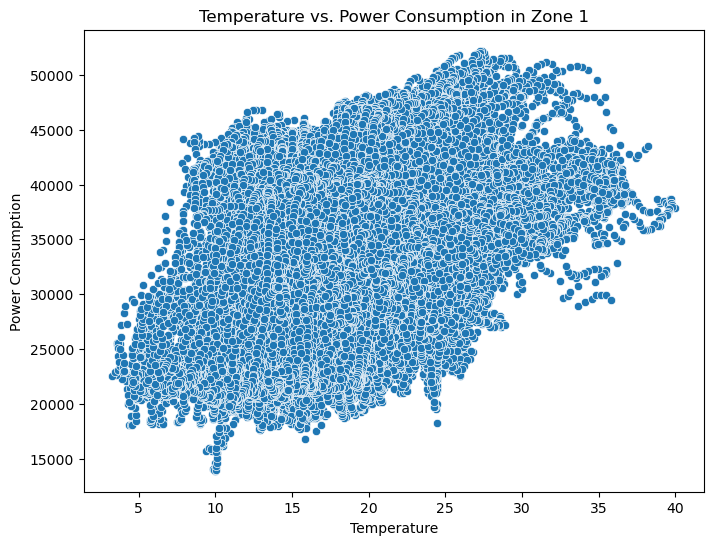

In [96]:
# 4. Relationship between Temperature and Power Consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='PowerConsumption_Zone1', data=df)
plt.title('Temperature vs. Power Consumption in Zone 1')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.show()

In [97]:
# 5. Average Power Consumption by Zone
zone_cols = [col for col in df.columns if 'PowerConsumption_Zone' in col]
avg_consumption = df[zone_cols].mean()
print("\nAverage Power Consumption by Zone:")
print(avg_consumption)


Average Power Consumption by Zone:
PowerConsumption_Zone1    32344.970564
PowerConsumption_Zone2    21042.509082
PowerConsumption_Zone3    17835.406218
dtype: float64


In [98]:
# 6. Maximum and Minimum Power Consumption
max_consumption = df[zone_cols].max()
min_consumption = df[zone_cols].min()
print("\nMaximum Power Consumption by Zone:")
print(max_consumption)
print("\nMinimum Power Consumption by Zone:")
print(min_consumption)


Maximum Power Consumption by Zone:
PowerConsumption_Zone1    52204.39512
PowerConsumption_Zone2    37408.86076
PowerConsumption_Zone3    47598.32636
dtype: float64

Minimum Power Consumption by Zone:
PowerConsumption_Zone1    13895.696200
PowerConsumption_Zone2     8560.081466
PowerConsumption_Zone3     5935.174070
dtype: float64


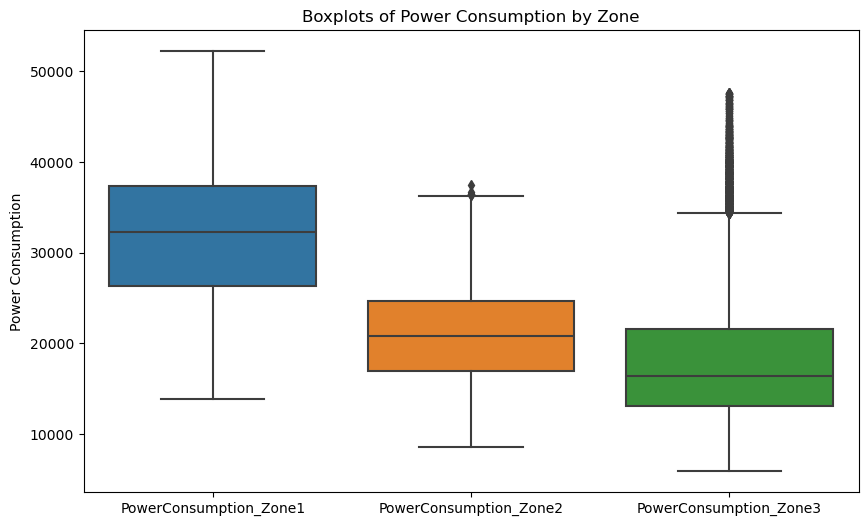

In [99]:
# 7. Boxplots for Power Consumption by Zone
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[zone_cols])
plt.title('Boxplots of Power Consumption by Zone')
plt.ylabel('Power Consumption')
plt.show()

In [100]:

# 8. Value Counts for Categorical Columns (if any)
# Replace 'categorical_column' with an actual categorical column name
if 'categorical_column' in df.columns:
     print(f"\nValue Counts for column 'categorical_column':")
     print(df['categorical_column'].value_counts())



C:\Users\sivad\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperature', ylabel='Count'>

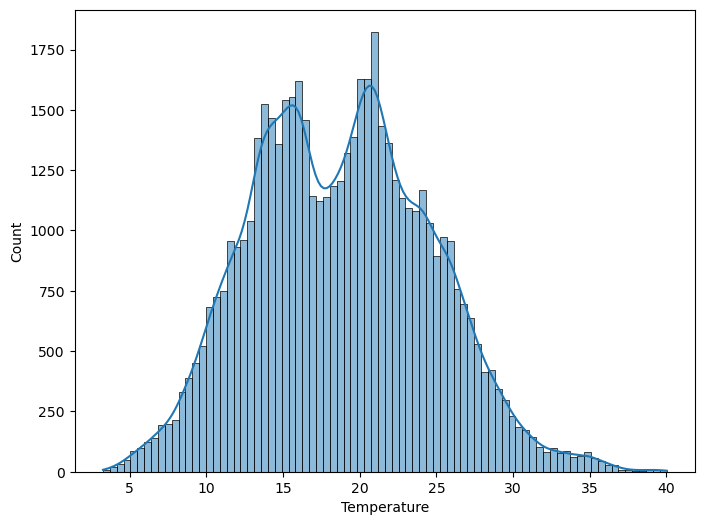

In [101]:
# 9. Histograms for Numerical Columns (example for Temperature)
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], kde=True)


C:\Users\sivad\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


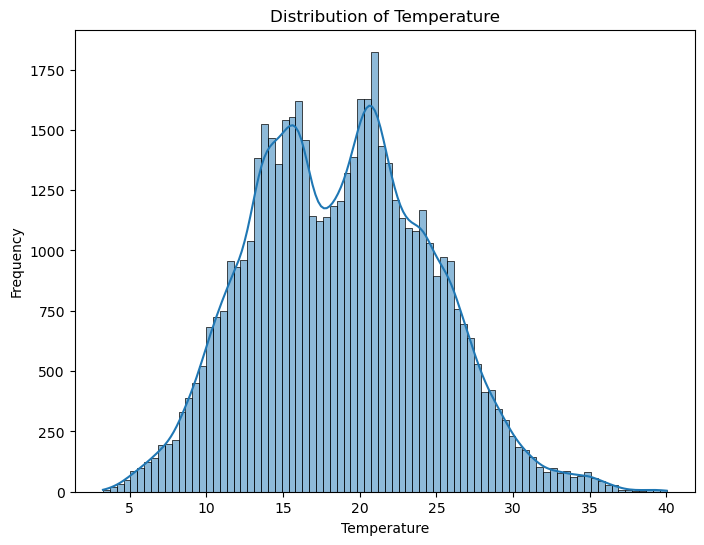

In [102]:
#Histograms for Numerical Columns (example for Temperature)
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

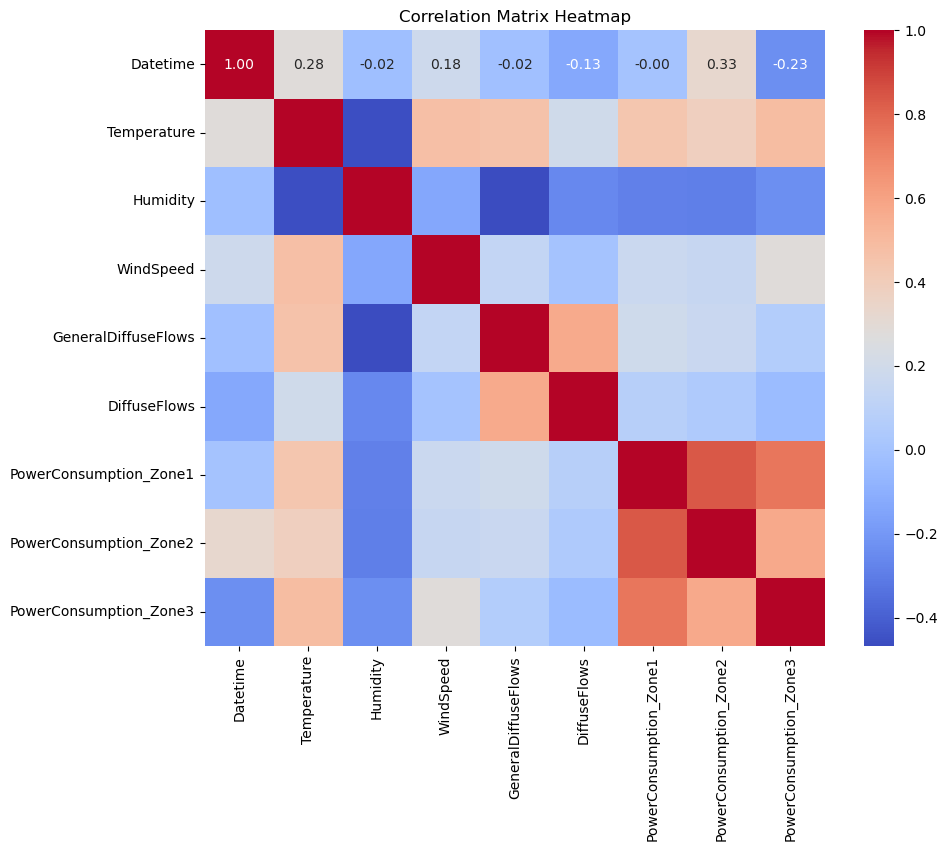

In [103]:
# 10. Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Mean Squared Error: 2065047.6252953075
Root Mean Squared Error: 1437.0273571840264
R-squared: 0.9591034217406965


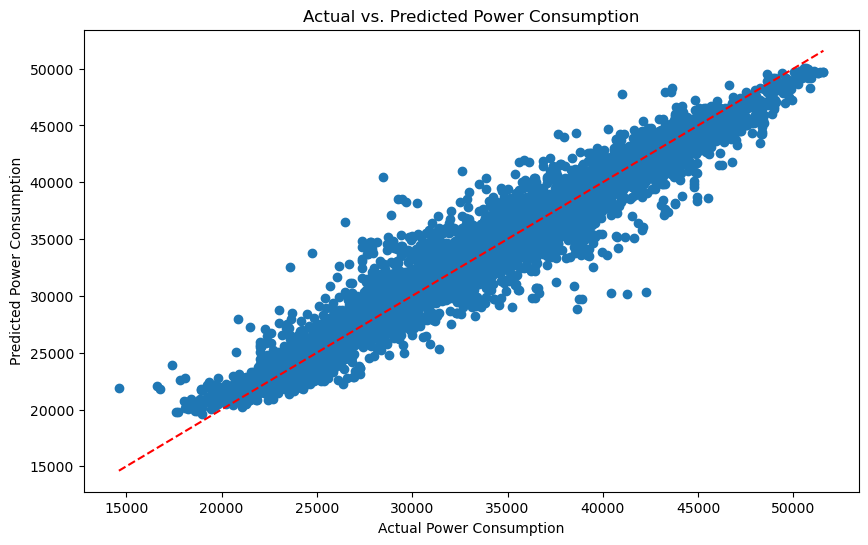

In [104]:
# Define features (X) and target variable (y)
# Replace 'PowerConsumption_Zone1' with the column you want to predict
X = df.drop('PowerConsumption_Zone1', axis=1)  
y = df['PowerConsumption_Zone1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Optional: Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Actual vs. Predicted Power Consumption")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

In [105]:
# Assuming you have a classification problem, convert regression to classification 
# by creating a threshold for power consumption (example: above/below the mean)
threshold = df['PowerConsumption_Zone1'].mean()
y_classified = (y > threshold).astype(int)  # 1 if above, 0 if below

In [106]:
# Split data into training and testing sets (for classification)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classified, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5285
           1       0.94      0.96      0.95      5199

    accuracy                           0.95     10484
   macro avg       0.95      0.95      0.95     10484
weighted avg       0.95      0.95      0.95     10484

Confusion Matrix:
[[4981  304]
 [ 230 4969]]


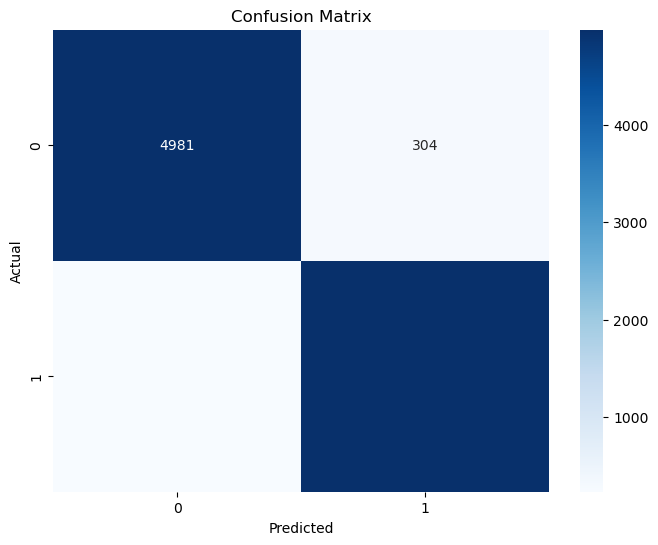

Precision: 0.9423478095960554
Recall: 0.955760723216003
F1-Score: 0.9490068754774637


In [107]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_class, y_train_class)


# Make predictions on the test set
y_pred_class = gb_classifier.predict(X_test_class)

# Evaluate the classification model
print(classification_report(y_test_class, y_pred_class))
#Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)

#Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Calculate precision, recall, and F1-score
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")